In [1]:
import time
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline

In [3]:
import torch
import torchvision
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
from torchvision.datasets import ImageFolder
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torch import Tensor

In [4]:
from functools import partial
from typing import Type, Any, Callable, Union, List, Optional
import torchvision.models as models
from torchvision.models.resnet import ResNet
#from ..utils import _log_api_usage_once
from types import FunctionType

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
def training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader):
    start_time = time.time()
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        print("Epoch {} running".format(epoch))
        model.train()
        running_loss = 0.
        running_corrects = 0 
        # load a batch data of images
        for i, (inputs, labels) in enumerate(train_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device) 
            # forward inputs and get output
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            # get loss value and update the network weights
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects / len(train_dataset) * 100.
        train_loss_list.append(epoch_loss)
        print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() -start_time))
    

        model.eval()
        with torch.no_grad():
            running_loss = 0.
            running_corrects = 0
            for inputs, labels in test_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(test_dataset)
            epoch_acc = running_corrects / len(test_dataset) * 100.
            test_loss_list.append(epoch_loss)
            print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time()- start_time))
        
    return train_loss_list, test_loss_list      

## Load datasets

In [7]:
train_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

In [8]:
train_dataset = ImageFolder('C:/Users/Aleksei_Bolshukhin/Desktop/computer_vision/2/Classification_data/Classification_data/train',
                      transform = train_transforms)
test_dataset = ImageFolder('C:/Users/Aleksei_Bolshukhin/Desktop/computer_vision/2/Classification_data/Classification_data/test',
                      transform = test_transforms)

(-0.5, 1125.5, 900.5, -0.5)

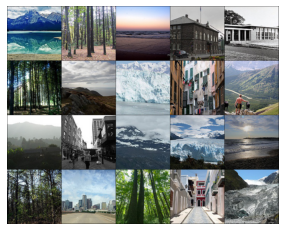

In [9]:
#Generating data loaders from the corresponding datasets
batch_size = 128
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
full_test_dataloader =  torch.utils.data.DataLoader(test_dataset)
  
#Plotting 20 images from the 1st batch 
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:20], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

In [10]:
print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))
class_names = train_dataset.classes
print('Class names:', class_names)

Train dataset size: 14034
Test dataset size: 3000
Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


## Train and compare some models

In [11]:
train_loss_dict = {}
test_loss_dict = {}

## Experiment without pretrained weights

In [12]:
from torchvision.models.resnet import ResNet, BasicBlock
class MyResNet18(ResNet):
    def __init__(self):
        super(MyResNet18, self).__init__(BasicBlock, [2, 2, 2, 2])


model = MyResNet18()


num_features = model.fc.in_features 
model.fc = nn.Linear(num_features, 6)
model = model.to(device)

lr_list = []
num_epochs=40
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [13]:
def training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader):
    start_time = time.time()
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        print("Epoch {} running".format(epoch))
        model.train()
        running_loss = 0.
        running_corrects = 0 
        # load a batch data of images
        for i, (inputs, labels) in enumerate(train_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device) 
            # forward inputs and get output
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            # get loss value and update the network weights
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects / len(train_dataset) * 100.
        train_loss_list.append(epoch_loss)
        print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() -start_time))
    

        model.eval()
        with torch.no_grad():
            running_loss = 0.
            running_corrects = 0
            for inputs, labels in test_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(test_dataset)
            epoch_acc = running_corrects / len(test_dataset) * 100.
            test_loss_list.append(epoch_loss)
            print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time()- start_time))
        
    return train_loss_list, test_loss_list      

In [14]:
train_loss_list, test_loss_list = training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader)

Epoch 0 running
[Train #0] Loss: 0.9911 Acc: 60.7168% Time: 912.6123s
[Test #0] Loss: 2.4960 Acc: 44.8667% Time: 982.5020s
Epoch 1 running
[Train #1] Loss: 0.6506 Acc: 76.3859% Time: 1892.6435s
[Test #1] Loss: 0.7931 Acc: 70.6000% Time: 1962.3804s
Epoch 2 running
[Train #2] Loss: 0.5033 Acc: 81.8940% Time: 2868.0097s
[Test #2] Loss: 8.9857 Acc: 29.6667% Time: 2936.6627s
Epoch 3 running
[Train #3] Loss: 0.4261 Acc: 84.5233% Time: 3838.2612s
[Test #3] Loss: 6.7187 Acc: 33.4333% Time: 3906.3928s
Epoch 4 running
[Train #4] Loss: 0.3536 Acc: 87.3236% Time: 4799.0448s
[Test #4] Loss: 1.9762 Acc: 55.3000% Time: 4868.2876s
Epoch 5 running
[Train #5] Loss: 0.3084 Acc: 89.0409% Time: 5760.0996s
[Test #5] Loss: 0.6163 Acc: 78.8667% Time: 5828.4175s
Epoch 6 running
[Train #6] Loss: 0.2667 Acc: 90.4731% Time: 6721.3886s
[Test #6] Loss: 2.1662 Acc: 55.8333% Time: 6789.9800s
Epoch 7 running
[Train #7] Loss: 0.1975 Acc: 93.2307% Time: 7677.5226s
[Test #7] Loss: 0.7867 Acc: 76.9000% Time: 7745.8864s
Ep

In [15]:
train_loss_list

[0.9911005783662066,
 0.6505845445453127,
 0.5032814884901012,
 0.4261279049610436,
 0.3535703120492234,
 0.3083919622465911,
 0.26672183228206714,
 0.1974706794035066,
 0.16568045849658763,
 0.13738515994114567,
 0.12057719200114775,
 0.09642006238123214,
 0.0781992974785194,
 0.04106824317684502,
 0.040877922662520945,
 0.038075829001854446,
 0.030579774916698676,
 0.02181413585395237,
 0.01451485839924429,
 0.01026177313576949,
 0.009724801855666933,
 0.009931273595393458,
 0.006979431141286269,
 0.007965285055741754,
 0.005610133778394512,
 0.004234862915424947,
 0.004976559991782269,
 0.004195468559924161,
 0.0034770308777748865,
 0.0040748276039283765,
 0.0033797416433621504,
 0.0034489561232843844,
 0.0027401224958970645,
 0.002983354872554284,
 0.002698505363461843,
 0.002275104253675192,
 0.0023420528650471752,
 0.003057688626611406,
 0.002791943503363562,
 0.0022952860884951874]

In [16]:
test_loss_list

[2.4960344556172687,
 0.7930961453119914,
 8.985666641235351,
 6.718728492736816,
 1.9761996301015219,
 0.6162699344952901,
 2.166237716992696,
 0.7867382175127665,
 1.1455639092127483,
 1.0071130263010661,
 0.9111365750630697,
 1.054420559724172,
 0.6355731132825215,
 0.7197449863751729,
 0.7730043878555298,
 0.853487165927887,
 0.5744034476280212,
 0.5858850994110107,
 0.5866393265724182,
 0.5766375400225321,
 0.633979288260142,
 0.5451462293465932,
 0.6057149806022644,
 1.0591444834073385,
 0.5426332414944967,
 0.6144637525876363,
 0.629245539188385,
 0.6276546518007914,
 0.5623785222371419,
 0.6028947369257609,
 0.5423115553458532,
 0.5402776579856873,
 0.5500253024101257,
 0.5480780461629232,
 0.5669824957847596,
 0.5490746617317199,
 0.5609895250002543,
 0.5552122621536255,
 0.5816766014099121,
 0.5674321199258169]

Text(0, 0.5, 'Training loss')

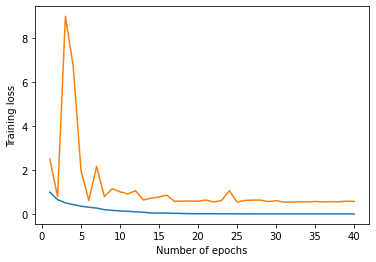

In [17]:
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.plot(range(1,num_epochs+1), test_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

## Experiment - without residual and weights

In [18]:
from torchvision.models.resnet import ResNet

In [19]:
def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=dilation,
        groups=groups,
        bias=False,
        dilation=dilation,
    )


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError("BasicBlock only supports groups=1 and base_width=64")
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        return out

In [20]:
class MyResNet18(ResNet):
    def __init__(self):
        super(MyResNet18, self).__init__(BasicBlock, [2, 2, 2, 2])


model = MyResNet18()
# if you need pretrained weights
#model.load_state_dict(models.resnet18(pretrained=True).state_dict())

num_epochs=40
num_features = model.fc.in_features 
model.fc = nn.Linear(num_features, 6)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [21]:
model

MyResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

In [22]:
train_loss_list, test_loss_list = training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader)

Epoch 0 running
[Train #0] Loss: 1.0942 Acc: 55.2088% Time: 1124.2280s
[Test #0] Loss: 1.0535 Acc: 60.3333% Time: 1190.8903s
Epoch 1 running
[Train #1] Loss: 0.6413 Acc: 76.4786% Time: 2099.6892s
[Test #1] Loss: 0.8139 Acc: 70.0333% Time: 2167.1296s
Epoch 2 running
[Train #2] Loss: 0.5035 Acc: 81.6945% Time: 3063.1137s
[Test #2] Loss: 1.0934 Acc: 64.4000% Time: 3129.5780s
Epoch 3 running
[Train #3] Loss: 0.4327 Acc: 84.5376% Time: 4029.7791s
[Test #3] Loss: 0.6468 Acc: 77.3000% Time: 4097.2918s
Epoch 4 running
[Train #4] Loss: 0.3775 Acc: 86.5612% Time: 5029.5023s
[Test #4] Loss: 0.7986 Acc: 71.0333% Time: 5096.4837s
Epoch 5 running
[Train #5] Loss: 0.3257 Acc: 88.4210% Time: 6008.9178s
[Test #5] Loss: 1.2924 Acc: 60.7667% Time: 6077.2389s
Epoch 6 running
[Train #6] Loss: 0.2786 Acc: 90.2095% Time: 6978.7877s
[Test #6] Loss: 0.9873 Acc: 71.1000% Time: 7045.6566s
Epoch 7 running
[Train #7] Loss: 0.2636 Acc: 90.4233% Time: 7943.2881s
[Test #7] Loss: 0.5433 Acc: 81.9000% Time: 8009.9804s


In [23]:
train_loss_list

[1.0941825896242465,
 0.6412826602370952,
 0.5035137889798726,
 0.4326779948768069,
 0.37747785033655756,
 0.3256982714298768,
 0.27863741367184675,
 0.26356414968732655,
 0.2059315200409302,
 0.16869206240463583,
 0.16350063971046438,
 0.14835147853333913,
 0.09515486160807925,
 0.07390720424309609,
 0.06476277075161091,
 0.060832215909716984,
 0.053407062220406934,
 0.04411723554607927,
 0.04747605339824533,
 0.03183487544397127,
 0.027210951653622792,
 0.019425646362522822,
 0.010998691517253946,
 0.00859660600265999,
 0.008150972455825382,
 0.0060259393876589615,
 0.005328022915778969,
 0.004549336131484015,
 0.004026381627888653,
 0.0029157101287768917,
 0.0026244721073065227,
 0.004219681963986706,
 0.003687989092612633,
 0.002477428108604127,
 0.0022130648331152316,
 0.0021720604784084925,
 0.0019894931023873483,
 0.002591907451921203,
 0.0018532918305724313,
 0.001570958437667746]

In [24]:
test_loss_list

[1.0534670564333597,
 0.813898097674052,
 1.0934151646296184,
 0.6468253409862519,
 0.7986465031305949,
 1.2923769852320353,
 0.9872696930567424,
 0.5433126257260641,
 0.813157948811849,
 0.6518506286938985,
 1.0954993549982708,
 1.068446980794271,
 1.0184623456001283,
 0.8831065769195556,
 0.5615472489992778,
 0.625319794178009,
 1.062937760035197,
 0.8856077262560527,
 0.8756937942504883,
 0.7138167632420858,
 0.6643329866727193,
 0.6314646497567494,
 0.5912240139643351,
 0.6866226382255555,
 0.5937849487463633,
 0.5792048241297404,
 0.5924174342155456,
 0.5912000273068746,
 0.604421980102857,
 0.5739360036849975,
 0.569263102054596,
 0.638824761390686,
 0.6142136767705282,
 0.6097454174757003,
 0.59980770667394,
 0.5845524441798527,
 0.6087292950948079,
 0.612426345427831,
 0.590732831478119,
 0.6152948331832886]

Text(0, 0.5, 'Training loss')

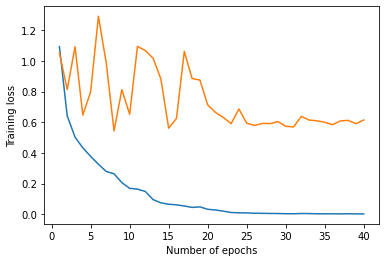

In [25]:
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.plot(range(1,num_epochs+1), test_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

## Experiment - without BN

In [38]:
def _log_api_usage_once(obj: Any) -> None:

    """
    Logs API usage(module and name) within an organization.
    In a large ecosystem, it's often useful to track the PyTorch and
    TorchVision APIs usage. This API provides the similar functionality to the
    logging module in the Python stdlib. It can be used for debugging purpose
    to log which methods are used and by default it is inactive, unless the user
    manually subscribes a logger via the `SetAPIUsageLogger method <https://github.com/pytorch/pytorch/blob/eb3b9fe719b21fae13c7a7cf3253f970290a573e/c10/util/Logging.cpp#L114>`_.
    Please note it is triggered only once for the same API call within a process.
    It does not collect any data from open-source users since it is no-op by default.
    For more information, please refer to
    * PyTorch note: https://pytorch.org/docs/stable/notes/large_scale_deployments.html#api-usage-logging;
    * Logging policy: https://github.com/pytorch/vision/issues/5052;
    Args:
        obj (class instance or method): an object to extract info from.
    """
    module = obj.__module__
    if not module.startswith("torchvision"):
        module = f"torchvision.internal.{module}"
    name = obj.__class__.__name__
    if isinstance(obj, FunctionType):
        name = obj.__name__
    torch._C._log_api_usage_once(f"{module}.{name}")

In [39]:
def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=dilation,
        groups=groups,
        bias=False,
        dilation=dilation,
    )


def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError("BasicBlock only supports groups=1 and base_width=64")
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        #self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        #self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        #out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        #out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.0)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        #out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        #out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        #out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        _log_api_usage_once(self)
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError(
                "replace_stride_with_dilation should be None "
                f"or a 3-element tuple, got {replace_stride_with_dilation}"
            )
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck) and m.bn3.weight is not None:
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock) and m.bn2.weight is not None:
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]

    def _make_layer(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        planes: int,
        blocks: int,
        stride: int = 1,
        dilate: bool = False,
    ) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(
            block(
                self.inplanes, planes, stride, downsample, self.groups, self.base_width, previous_dilation, norm_layer
            )
        )
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(
                block(
                    self.inplanes,
                    planes,
                    groups=self.groups,
                    base_width=self.base_width,
                    dilation=self.dilation,
                    norm_layer=norm_layer,
                )
            )

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        #x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)

In [40]:
class MyResNet18(ResNet):
    def __init__(self):
        super(MyResNet18, self).__init__(BasicBlock, [2, 2, 2, 2])


model = MyResNet18()
# if you need pretrained weights
#model.load_state_dict(models.resnet18(pretrained=True).state_dict())

num_epochs=40
num_features = model.fc.in_features 
model.fc = nn.Linear(num_features, 6)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [41]:
model

MyResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [42]:
train_loss_list, test_loss_list = training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader)

Epoch 0 running
[Train #0] Loss: 1.1628 Acc: 53.3918% Time: 914.6175s
[Test #0] Loss: 1.6070 Acc: 38.9333% Time: 984.0770s
Epoch 1 running
[Train #1] Loss: 0.8082 Acc: 69.1535% Time: 1905.8734s
[Test #1] Loss: 1.1909 Acc: 52.2333% Time: 1979.0946s
Epoch 2 running
[Train #2] Loss: 0.6743 Acc: 74.9822% Time: 2923.6944s
[Test #2] Loss: 0.8536 Acc: 66.9000% Time: 2997.8305s
Epoch 3 running
[Train #3] Loss: 0.5894 Acc: 78.6233% Time: 3954.8768s
[Test #3] Loss: 1.2295 Acc: 53.8667% Time: 4033.1483s
Epoch 4 running
[Train #4] Loss: 0.5184 Acc: 81.0318% Time: 4988.7853s
[Test #4] Loss: 0.8981 Acc: 68.8000% Time: 5056.9719s
Epoch 5 running
[Train #5] Loss: 0.4734 Acc: 82.8630% Time: 5933.8559s
[Test #5] Loss: 0.6575 Acc: 75.8000% Time: 6003.5474s
Epoch 6 running
[Train #6] Loss: 0.4581 Acc: 83.1908% Time: 6884.8874s
[Test #6] Loss: 0.6630 Acc: 76.7000% Time: 6952.5959s
Epoch 7 running
[Train #7] Loss: 0.4143 Acc: 85.2786% Time: 7833.8923s
[Test #7] Loss: 1.0497 Acc: 62.3667% Time: 7902.4291s
Ep

In [43]:
train_loss_list

[1.162844537473972,
 0.8081892916445075,
 0.6742579733372346,
 0.5893718034211635,
 0.5184097222764047,
 0.4733524639857568,
 0.45809373385685026,
 0.4143005534677368,
 0.38286141498452053,
 0.3437632660725118,
 0.336364819471935,
 0.30073350118158615,
 0.28383252201120074,
 0.24988136408980355,
 0.24268985220606856,
 0.2189788006599666,
 0.18830946759100872,
 0.17527081443319908,
 0.1564228831479416,
 0.13597453294383743,
 0.13736680294647843,
 0.08359147998700374,
 0.11498593884399852,
 0.06520163427862632,
 0.09090070910215615,
 0.05389030964547911,
 0.05086155521388881,
 0.04902667412421541,
 0.06862867772324363,
 0.05716881374855726,
 0.05877464894511658,
 0.03965976823732369,
 0.02051832211358231,
 0.015889448042466836,
 0.01994247731945276,
 0.018004731434409744,
 0.02093810847941433,
 0.020854917063818573,
 0.016257498860976688,
 0.013060653676042708]

In [44]:
test_loss_list 

[1.6070108938217162,
 1.190910924275716,
 0.8536499884923299,
 1.2295013265609742,
 0.89805437930425,
 0.657527046362559,
 0.6629645614624023,
 1.0496831029256184,
 1.8040720850626628,
 1.0501585737864176,
 0.6938795879681905,
 1.063814198176066,
 0.7553261464436849,
 0.7103480281829834,
 0.6330179045995077,
 1.006511599222819,
 0.4697777508099874,
 0.7113389666875204,
 0.8023337610562642,
 1.2347954632441203,
 0.7375481053988139,
 1.0055112509727477,
 0.7007880865335464,
 2.3367952111562094,
 0.7109776028792063,
 0.6657221854527792,
 1.1346665110588074,
 1.264971760114034,
 1.2158631483713787,
 1.2715264876683554,
 0.678584798336029,
 0.9130597046216329,
 0.8208530184427897,
 0.834822839419047,
 0.9289061921437581,
 1.006066013654073,
 0.870682022968928,
 0.849362109820048,
 0.9564134635925293,
 0.7871620988051097]

Text(0, 0.5, 'Training loss')

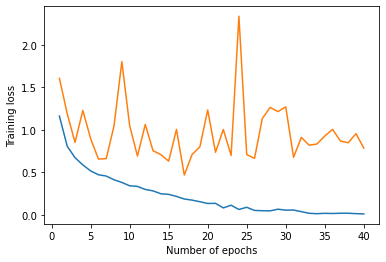

In [45]:
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.plot(range(1,num_epochs+1), test_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

## Experiment with cosine_linearwarpup

In [46]:
import math
import torch
from torch.optim.lr_scheduler import _LRScheduler

class CosineAnnealingWarmupRestarts(_LRScheduler):
    """
        optimizer (Optimizer): Wrapped optimizer.
        first_cycle_steps (int): First cycle step size.
        cycle_mult(float): Cycle steps magnification. Default: -1.
        max_lr(float): First cycle's max learning rate. Default: 0.1.
        min_lr(float): Min learning rate. Default: 0.001.
        warmup_steps(int): Linear warmup step size. Default: 0.
        gamma(float): Decrease rate of max learning rate by cycle. Default: 1.
        last_epoch (int): The index of last epoch. Default: -1.
    """
    
    def __init__(self,
                 optimizer : torch.optim.Optimizer,
                 first_cycle_steps : int,
                 cycle_mult : float = 1.,
                 max_lr : float = 0.1,
                 min_lr : float = 0.001,
                 warmup_steps : int = 0,
                 gamma : float = 1.,
                 last_epoch : int = -1
        ):
        assert warmup_steps < first_cycle_steps
        
        self.first_cycle_steps = first_cycle_steps # first cycle step size
        self.cycle_mult = cycle_mult # cycle steps magnification
        self.base_max_lr = max_lr # first max learning rate
        self.max_lr = max_lr # max learning rate in the current cycle
        self.min_lr = min_lr # min learning rate
        self.warmup_steps = warmup_steps # warmup step size
        self.gamma = gamma # decrease rate of max learning rate by cycle
        
        self.cur_cycle_steps = first_cycle_steps # first cycle step size
        self.cycle = 0 # cycle count
        self.step_in_cycle = last_epoch # step size of the current cycle
        
        super(CosineAnnealingWarmupRestarts, self).__init__(optimizer, last_epoch)
        
        # set learning rate min_lr
        self.init_lr()
    
    def init_lr(self):
        self.base_lrs = []
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = self.min_lr
            self.base_lrs.append(self.min_lr)
    
    def get_lr(self):
        if self.step_in_cycle == -1:
            return self.base_lrs
        elif self.step_in_cycle < self.warmup_steps:
            return [(self.max_lr - base_lr)*self.step_in_cycle / self.warmup_steps + base_lr for base_lr in self.base_lrs]
        else:
            return [base_lr + (self.max_lr - base_lr) \
                    * (1 + math.cos(math.pi * (self.step_in_cycle-self.warmup_steps) \
                                    / (self.cur_cycle_steps - self.warmup_steps))) / 2
                    for base_lr in self.base_lrs]

    def step(self, epoch=None):
        if epoch is None:
            epoch = self.last_epoch + 1
            self.step_in_cycle = self.step_in_cycle + 1
            if self.step_in_cycle >= self.cur_cycle_steps:
                self.cycle += 1
                self.step_in_cycle = self.step_in_cycle - self.cur_cycle_steps
                self.cur_cycle_steps = int((self.cur_cycle_steps - self.warmup_steps) * self.cycle_mult) + self.warmup_steps
        else:
            if epoch >= self.first_cycle_steps:
                if self.cycle_mult == 1.:
                    self.step_in_cycle = epoch % self.first_cycle_steps
                    self.cycle = epoch // self.first_cycle_steps
                else:
                    n = int(math.log((epoch / self.first_cycle_steps * (self.cycle_mult - 1) + 1), self.cycle_mult))
                    self.cycle = n
                    self.step_in_cycle = epoch - int(self.first_cycle_steps * (self.cycle_mult ** n - 1) / (self.cycle_mult - 1))
                    self.cur_cycle_steps = self.first_cycle_steps * self.cycle_mult ** (n)
            else:
                self.cur_cycle_steps = self.first_cycle_steps
                self.step_in_cycle = epoch
                
        self.max_lr = self.base_max_lr * (self.gamma**self.cycle)
        self.last_epoch = math.floor(epoch)
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

In [47]:
from torchvision.models.resnet import ResNet, BasicBlock
class MyResNet18(ResNet):
    def __init__(self):
        super(MyResNet18, self).__init__(BasicBlock, [2, 2, 2, 2])


model = MyResNet18()


num_features = model.fc.in_features 
model.fc = nn.Linear(num_features, 6)
model = model.to(device)

lr_list = []
num_epochs=40
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler=CosineAnnealingWarmupRestarts(optimizer,
                                          first_cycle_steps=20,
                                          cycle_mult=1.0,
                                          max_lr=0.01,
                                          min_lr=0.001,
                                          warmup_steps=4,
                                          gamma=1.0)

In [48]:
def training_model(model, num_epochs, optimizer, criterion, scheduler, train_dataloader, test_dataloader):
    start_time = time.time()
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        print("Epoch {} running".format(epoch))
        model.train()
        running_loss = 0.
        running_corrects = 0 
        # load a batch data of images
        for i, (inputs, labels) in enumerate(train_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device) 
            # forward inputs and get output
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            # get loss value and update the network weights
            loss.backward()
            optimizer.step()
            #print(optimizer.state_dict()["param_groups"][0]["lr"])
            lr_list.append(optimizer.state_dict()["param_groups"][0]["lr"])
            scheduler.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        # scheduler.step()
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects / len(train_dataset) * 100.
        train_loss_list.append(epoch_loss)
        print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() -start_time))
    

        model.eval()
        with torch.no_grad():
            running_loss = 0.
            running_corrects = 0
            for inputs, labels in test_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(test_dataset)
            epoch_acc = running_corrects / len(test_dataset) * 100.
            test_loss_list.append(epoch_loss)
            print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time()- start_time))
        
    return train_loss_list, test_loss_list      

In [49]:
train_loss_list, test_loss_list = training_model(model, num_epochs, optimizer, criterion, scheduler, train_dataloader, test_dataloader)

Epoch 0 running
[Train #0] Loss: 1.0253 Acc: 59.0281% Time: 976.6329s
[Test #0] Loss: 2.1262 Acc: 38.2667% Time: 1054.0955s
Epoch 1 running
[Train #1] Loss: 0.6841 Acc: 74.5261% Time: 2029.8563s
[Test #1] Loss: 3.2257 Acc: 38.2667% Time: 2106.2348s
Epoch 2 running
[Train #2] Loss: 0.5292 Acc: 80.7396% Time: 3094.5185s
[Test #2] Loss: 0.6862 Acc: 74.8000% Time: 3172.9148s
Epoch 3 running
[Train #3] Loss: 0.4546 Acc: 83.6754% Time: 4169.9202s
[Test #3] Loss: 0.6274 Acc: 78.3000% Time: 4248.8946s
Epoch 4 running
[Train #4] Loss: 0.4225 Acc: 84.7941% Time: 5274.7744s
[Test #4] Loss: 0.9288 Acc: 71.5000% Time: 5352.4836s
Epoch 5 running
[Train #5] Loss: 0.3798 Acc: 86.4900% Time: 6340.2717s
[Test #5] Loss: 0.5581 Acc: 79.6333% Time: 6419.0062s
Epoch 6 running
[Train #6] Loss: 0.3089 Acc: 88.9411% Time: 7417.9945s
[Test #6] Loss: 4.0698 Acc: 38.9333% Time: 7493.6689s
Epoch 7 running
[Train #7] Loss: 0.2984 Acc: 89.2903% Time: 8479.7540s
[Test #7] Loss: 0.5539 Acc: 80.7667% Time: 8555.5748s
E

In [51]:
train_loss_list

[1.0253334207226956,
 0.6841360372543607,
 0.5292027762078213,
 0.454625582999104,
 0.422498548321359,
 0.3798212690776071,
 0.30893027751435914,
 0.29836096627022174,
 0.22597794396781812,
 0.21192543990076548,
 0.16750865632760248,
 0.1327660186488319,
 0.09770615918948573,
 0.07667992828904656,
 0.05993885188940177,
 0.03823405242296358,
 0.023740695137517292,
 0.04069528117583733,
 0.023088886639990154,
 0.016990957968016626,
 0.012392727943110478,
 0.011304670889530471,
 0.011437810572765177,
 0.008983602953573842,
 0.009516518526665843,
 0.006037762658281664,
 0.006726498602830681,
 0.006268366992093879,
 0.006281293724361344,
 0.005380909503461469,
 0.005536404744809148,
 0.005206175173513814,
 0.004912855860518919,
 0.0036316492723321493,
 0.003252691404395086,
 0.004349966869372713,
 0.005624816116228014,
 0.004317654897728944,
 0.004140794155827733,
 0.004080319392232197]

In [52]:
test_loss_list

[2.1261751035054526,
 3.225736703236898,
 0.6861806619962056,
 0.6273872486750285,
 0.9288352147738139,
 0.5581132371425629,
 4.069762627919515,
 0.5538832674026489,
 0.9906069566408793,
 0.5300609320004781,
 1.209730008761088,
 0.7692889022827148,
 1.0215361088116963,
 0.6671268606185913,
 1.0333775687217712,
 0.545553320089976,
 1.2998775513966878,
 0.5638989276885986,
 0.6486115120251974,
 0.6340003250439962,
 0.6067831947008768,
 0.7533238035837809,
 0.5858887739976247,
 0.561146737019221,
 0.6128450651168823,
 0.5597507185935974,
 0.6753788986206055,
 0.5724021755059561,
 0.6051256106694539,
 0.5893250842094422,
 0.581316364924113,
 0.5831653833389282,
 0.6460902756055196,
 0.5819242749214172,
 0.5779583991368612,
 0.608764064947764,
 0.6309308546384176,
 0.5946436109940211,
 0.5800497403144836,
 0.5778104696273804]

In [54]:
lr_list

[0.001,
 0.0032500000000000003,
 0.0055000000000000005,
 0.007750000000000001,
 0.010000000000000002,
 0.009913533761814537,
 0.009657457896300792,
 0.009241613255361453,
 0.008681980515339464,
 0.00800006604858821,
 0.007222075445642905,
 0.006377906449072579,
 0.0055000000000000005,
 0.004622093550927424,
 0.0037779245543570965,
 0.0029999339514117916,
 0.0023180194846605367,
 0.001758386744638546,
 0.0013425421036992098,
 0.001086466238185463,
 0.001,
 0.0032500000000000003,
 0.0055000000000000005,
 0.007750000000000001,
 0.010000000000000002,
 0.009913533761814537,
 0.009657457896300792,
 0.009241613255361453,
 0.008681980515339464,
 0.00800006604858821,
 0.007222075445642905,
 0.006377906449072579,
 0.0055000000000000005,
 0.004622093550927424,
 0.0037779245543570965,
 0.0029999339514117916,
 0.0023180194846605367,
 0.001758386744638546,
 0.0013425421036992098,
 0.001086466238185463,
 0.001,
 0.0032500000000000003,
 0.0055000000000000005,
 0.007750000000000001,
 0.0100000000000000

Text(0, 0.5, 'Training loss')

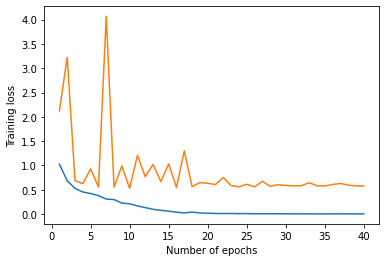

In [53]:
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.plot(range(1,num_epochs+1), test_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

## Experiment with SiLU

In [55]:
def _log_api_usage_once(obj: Any) -> None:

    """
    Logs API usage(module and name) within an organization.
    In a large ecosystem, it's often useful to track the PyTorch and
    TorchVision APIs usage. This API provides the similar functionality to the
    logging module in the Python stdlib. It can be used for debugging purpose
    to log which methods are used and by default it is inactive, unless the user
    manually subscribes a logger via the `SetAPIUsageLogger method <https://github.com/pytorch/pytorch/blob/eb3b9fe719b21fae13c7a7cf3253f970290a573e/c10/util/Logging.cpp#L114>`_.
    Please note it is triggered only once for the same API call within a process.
    It does not collect any data from open-source users since it is no-op by default.
    For more information, please refer to
    * PyTorch note: https://pytorch.org/docs/stable/notes/large_scale_deployments.html#api-usage-logging;
    * Logging policy: https://github.com/pytorch/vision/issues/5052;
    Args:
        obj (class instance or method): an object to extract info from.
    """
    module = obj.__module__
    if not module.startswith("torchvision"):
        module = f"torchvision.internal.{module}"
    name = obj.__class__.__name__
    if isinstance(obj, FunctionType):
        name = obj.__name__
    torch._C._log_api_usage_once(f"{module}.{name}")

In [64]:
class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError("BasicBlock only supports groups=1 and base_width=64")
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.SiLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.0)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.SiLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None,
    ) -> None:
        super().__init__()
        _log_api_usage_once(self)
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError(
                "replace_stride_with_dilation should be None "
                f"or a 3-element tuple, got {replace_stride_with_dilation}"
            )
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.SiLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck) and m.bn3.weight is not None:
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock) and m.bn2.weight is not None:
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]

    def _make_layer(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        planes: int,
        blocks: int,
        stride: int = 1,
        dilate: bool = False,
    ) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(
            block(
                self.inplanes, planes, stride, downsample, self.groups, self.base_width, previous_dilation, norm_layer
            )
        )
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(
                block(
                    self.inplanes,
                    planes,
                    groups=self.groups,
                    base_width=self.base_width,
                    dilation=self.dilation,
                    norm_layer=norm_layer,
                )
            )

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)

In [65]:
class MyResNet18(ResNet):
    def __init__(self):
        super(MyResNet18, self).__init__(BasicBlock, [2, 2, 2, 2])


model = MyResNet18()
# if you need pretrained weights
#model.load_state_dict(models.resnet18(pretrained=True).state_dict())

num_epochs=40
num_features = model.fc.in_features 
model.fc = nn.Linear(num_features, 6)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [66]:
def training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader):
    start_time = time.time()
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        print("Epoch {} running".format(epoch))
        model.train()
        running_loss = 0.
        running_corrects = 0 
        # load a batch data of images
        for i, (inputs, labels) in enumerate(train_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device) 
            # forward inputs and get output
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            # get loss value and update the network weights
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects / len(train_dataset) * 100.
        train_loss_list.append(epoch_loss)
        print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() -start_time))
    

        model.eval()
        with torch.no_grad():
            running_loss = 0.
            running_corrects = 0
            for inputs, labels in test_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / len(test_dataset)
            epoch_acc = running_corrects / len(test_dataset) * 100.
            test_loss_list.append(epoch_loss)
            print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time()- start_time))
        
    return train_loss_list, test_loss_list      

In [67]:
train_loss_list, test_loss_list = training_model(model, num_epochs, optimizer, criterion, train_dataloader, test_dataloader)

Epoch 0 running
[Train #0] Loss: 0.9755 Acc: 61.1729% Time: 1078.9491s
[Test #0] Loss: 2.4188 Acc: 43.5667% Time: 1166.3472s
Epoch 1 running
[Train #1] Loss: 0.5885 Acc: 78.4167% Time: 2260.1487s
[Test #1] Loss: 0.7597 Acc: 74.1333% Time: 2345.3974s
Epoch 2 running
[Train #2] Loss: 0.4608 Acc: 83.1979% Time: 3442.9019s
[Test #2] Loss: 1.0172 Acc: 66.4667% Time: 3527.7159s
Epoch 3 running
[Train #3] Loss: 0.3978 Acc: 86.0197% Time: 4616.5288s
[Test #3] Loss: 4.6518 Acc: 32.4333% Time: 4701.9739s
Epoch 4 running
[Train #4] Loss: 0.3170 Acc: 88.6846% Time: 5798.6496s
[Test #4] Loss: 4.4980 Acc: 41.3333% Time: 5883.5213s
Epoch 5 running
[Train #5] Loss: 0.2794 Acc: 89.9387% Time: 6973.9572s
[Test #5] Loss: 0.5257 Acc: 81.0000% Time: 7065.7013s
Epoch 6 running
[Train #6] Loss: 0.2153 Acc: 92.3400% Time: 8156.8049s
[Test #6] Loss: 0.8511 Acc: 72.4333% Time: 8242.5968s
Epoch 7 running
[Train #7] Loss: 0.1505 Acc: 94.7413% Time: 9341.1273s
[Test #7] Loss: 0.8435 Acc: 74.9333% Time: 9426.5054s


In [68]:
train_loss_list

[0.9754558471137003,
 0.5885343044057639,
 0.460841209800627,
 0.3978299615354947,
 0.3170084860380243,
 0.2794341052361698,
 0.2152729412590963,
 0.15053018247179112,
 0.10334558362369271,
 0.09520239128683543,
 0.08647731042951366,
 0.05112757891293382,
 0.029348684651083003,
 0.025381415100093705,
 0.01680724291857961,
 0.015228114365598058,
 0.010045459523044625,
 0.007491260080403058,
 0.010177085767660035,
 0.007237942575573819,
 0.005239016343246523,
 0.005449170604294695,
 0.005012855397674587,
 0.0037116342260115655,
 0.004538701956808854,
 0.004035026255954023,
 0.004084643170995925,
 0.0029595352863452003,
 0.002642086869144452,
 0.00313841540682161,
 0.003027844065416074,
 0.0027397186134686916,
 0.003081086988163215,
 0.002963926070562893,
 0.0025719023242025286,
 0.0024918710174346693,
 0.0025603603255770833,
 0.002238569847554368,
 0.0022189182658112457,
 0.002127719016677201]

In [69]:
test_loss_list

[2.418771334966024,
 0.7597134194374084,
 1.0172495522499085,
 4.651828188578288,
 4.4979849065144855,
 0.5256855044364929,
 0.8510702644983927,
 0.8434869016011556,
 5.500658822377523,
 0.6561532244682312,
 1.3574478743871052,
 1.5905981769561768,
 0.7314930259386698,
 0.5979751124382019,
 0.6141412574450175,
 0.5679466783205668,
 0.5345418085257212,
 0.5231544000307718,
 0.5619104053179423,
 0.5382551463445028,
 0.5625224010944366,
 0.5421546397209167,
 0.5407571195761363,
 0.5518223830858866,
 0.5397777671813965,
 0.5418262745539347,
 0.5460113581816355,
 0.530406411965688,
 0.5562153851191203,
 0.5465898145039876,
 0.5409235428174337,
 0.5427953136364619,
 0.560540182908376,
 0.5369053781827291,
 0.5410139260292053,
 0.5435990657806397,
 0.5479510838985443,
 0.5416044387022654,
 0.5558091226418813,
 0.5474393575986226]

Text(0, 0.5, 'Training loss')

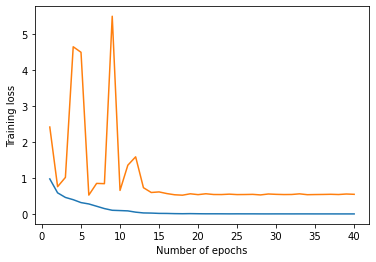

In [70]:
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.plot(range(1,num_epochs+1), test_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")